In [1]:
from matplotlib import pyplot as plt
import numpy as np
import itertools

# Introduction
In this lab we will be implementing an algorithm for perceptrons to determine a proper decision function. We will be repeating this process with non-linear separable variables to see what happens with the accuracy.

# Method
We will be creating a sample data using two classes that are sparable linearly and test the decision function. After that we will implement the generalized decision function formulation for the i'th order and with n dimensions. 

In [2]:
def predict(c_weight,input_val):
    return np.dot(c_weight,input_val)

In [3]:
def accuracy(ypred,ytest):
    
    r = 0
    t = 0
    
    for i in range(len(ypred)):
        if(ypred[i] < 0 and ytest[i] == -1):
            r = r + 1
        elif(ypred[i] > 0 and ytest[i] == 1):
            r = r + 1
        t = t + 1    
    
    ratio = r/t
    return ratio

In [4]:
def weight_updater(c_weight,input_val,target,lr=0.001):
    y = np.dot(c_weight,input_val)
    if(y > 0 and target == -1):
        return (c_weight - (lr*input_val))
    elif(y < 0 and target == 1):
        return (c_weight + (lr*input_val))
    return c_weight


In [5]:
def plot(x,y,class_y,weight):
    for i in range(x.shape[0]):
        current = np.array([x[i],y[i],1])
        line_eq = (( weight[0]/weight[1] )*np.array([0,1,2])) + weight[2]/weight[1]
        plt.scatter(x,y,c=class_y)
        plt.plot([0,1,2],line_eq)
        plt.ylim([-2,4])
        plt.xlim([-2,4])
        plt.show()
        print(weight)
        weight = weight_updater(weight,current,class_y[i],.2)

In [6]:
def combinations(var,deg):
    var.append(np.ones_like(var[0]))
    idx = []
    for i in range(len(var)):
        idx.append(i)
    combinations = list(itertools.combinations_with_replacement(idx, deg))
    weights = np.ones(len(combinations))
    return (var,combinations,weights)

In [7]:
def out_calculation(var,combinations,weights_k,idx):
    r = 0
    count = 0
    for comb in combinations:
        temp = 1
        for i in range(len(comb)):
            temp = temp*var[comb[i]][idx]
        temp = temp*weights_k[count]
        count+=1
        r = r + temp
    return r

In [8]:
x = np.array([0,0,1,1,0,0,1,1])
y = np.array([0,1,0,1,3,2,2,3])
class_y = np.array([-1,-1,-1,-1,1,1,1,1])
#starting weights
weight = [1,1,0]

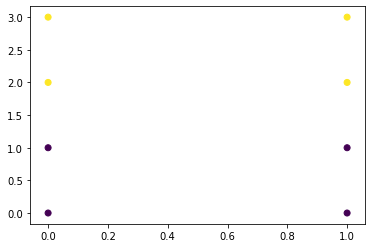

In [9]:
plt.scatter(x,y,c=class_y)

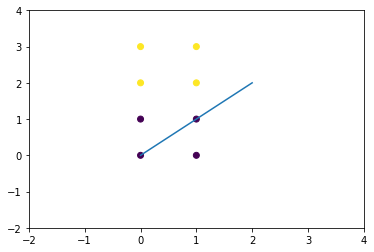

[1, 1, 0]


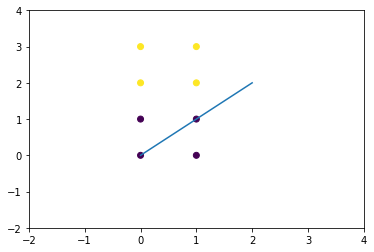

[1, 1, 0]


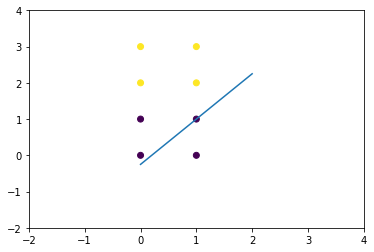

[ 1.   0.8 -0.2]


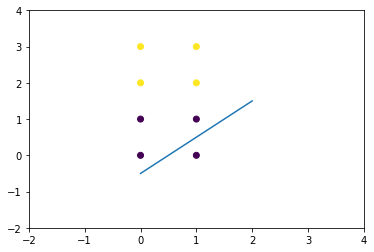

[ 0.8  0.8 -0.4]


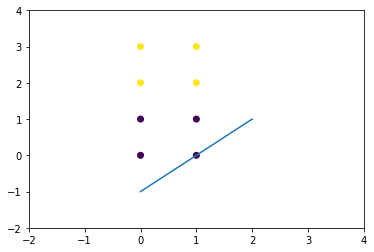

[ 0.6  0.6 -0.6]


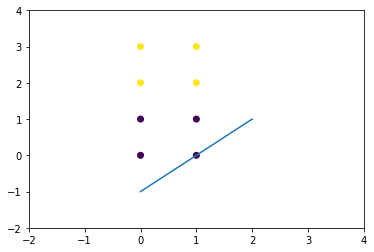

[ 0.6  0.6 -0.6]


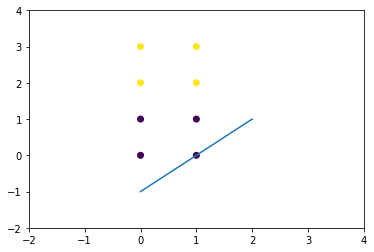

[ 0.6  0.6 -0.6]


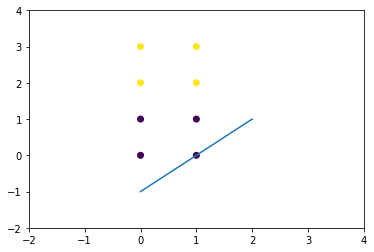

[ 0.6  0.6 -0.6]


In [10]:
for i in range(x.shape[0]):
    current = np.array([x[i],y[i],1])
    line_eq = (( weight[0]/weight[1] )*np.array([0,1,2])) + weight[2]/weight[1]
    plt.scatter(x,y,c=class_y)
    plt.plot([0,1,2],line_eq)
    plt.ylim([-2,4])
    plt.xlim([-2,4])
    plt.show()
    print(weight)
    weight = weight_updater(weight,current,class_y[i],.2)

In [11]:
y_predicted = []
for i in range(x.shape[0]):
    current = np.array([x[i],y[i],1])
    y_predicted.append(predict(weight,current))


    
acc = accuracy(y_predicted,class_y)
print("Accuracy: " , 100*acc , "%")

Accuracy:  62.5 %


In [12]:
print(y_predicted)

[-0.6000000000000001, 0.0, 0.0, 0.6000000000000001, 1.2000000000000002, 0.6000000000000001, 1.2000000000000002, 1.8000000000000003]


In [13]:
x = np.array([0,0,0,0,1,1,1,1])
y = np.array([0,1,2,3,0,1,2,3])
class_y =  ([-1,-1,-1,-1,1,1,1,1])
#starting weights
weight = [1,1,0]

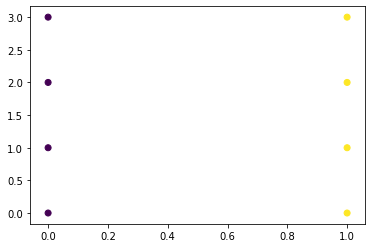

In [14]:
plt.scatter(x,y,c=class_y)

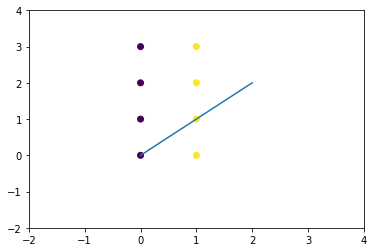

[1, 1, 0]


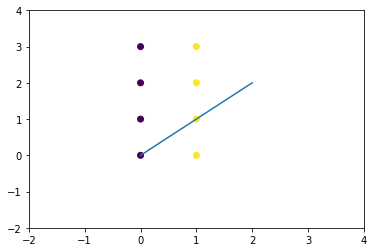

[1, 1, 0]


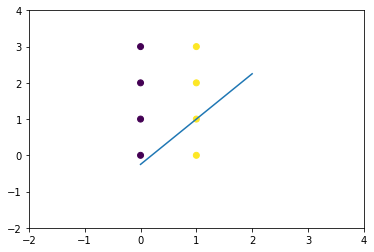

[ 1.   0.8 -0.2]


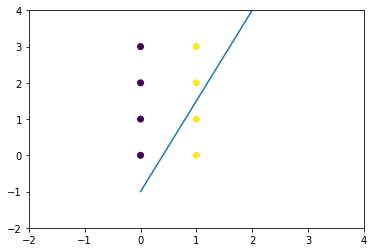

[ 1.   0.4 -0.4]


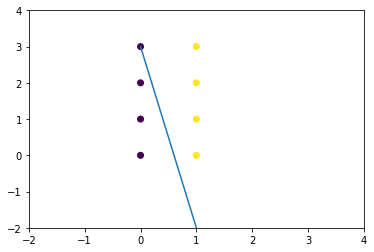

[ 1.  -0.2 -0.6]


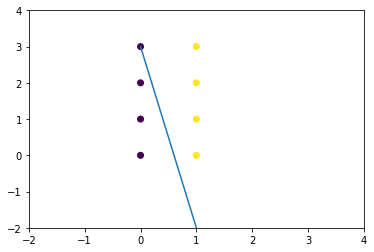

[ 1.  -0.2 -0.6]


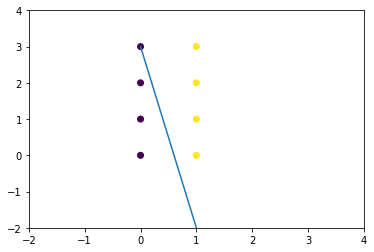

[ 1.  -0.2 -0.6]


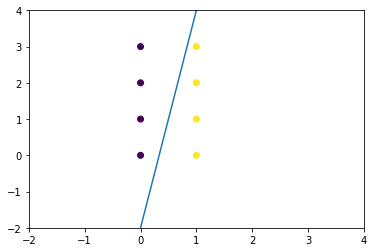

[ 1.2  0.2 -0.4]


In [15]:
for i in range(x.shape[0]):
    current = np.array([x[i],y[i],1])
    line_eq = (( weight[0]/weight[1] )*np.array([0,1,2])) + weight[2]/weight[1]
    plt.scatter(x,y,c=class_y)
    plt.plot([0,1,2],line_eq)
    plt.ylim([-2,4])
    plt.xlim([-2,4])
    plt.show()
    print(weight)
    weight = weight_updater(weight,current,class_y[i],.2)

In [16]:
y_predicted = []
for i in range(x.shape[0]):
    current = np.array([x[i],y[i],1])
    y_predicted.append(predict(weight,current))


    
acc = accuracy(y_predicted,class_y)
print("Accuracy: " , 100*acc , "%")

Accuracy:  87.5 %


**Nonlinear  Approach**

In [17]:
x = np.array([0,0,0,0,1,1,1,1])
y = np.array([0,1,2,3,0,1,2,3])
class_y =  ([1,-1,1,-1,-1,-1,1,1])
#starting weights
weight = [-1,1,1]

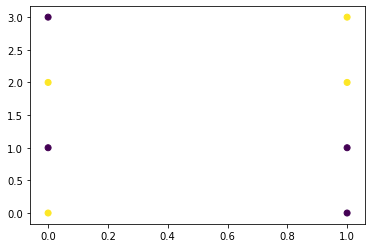

In [18]:
plt.scatter(x,y,c=class_y)

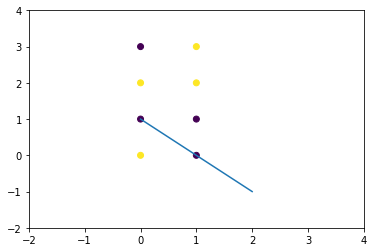

[-1, 1, 1]


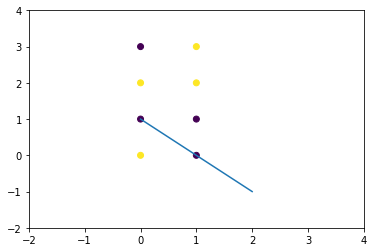

[-1, 1, 1]


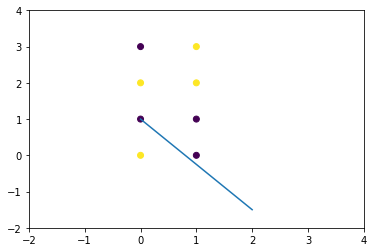

[-1.   0.8  0.8]


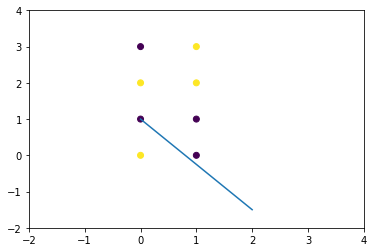

[-1.   0.8  0.8]


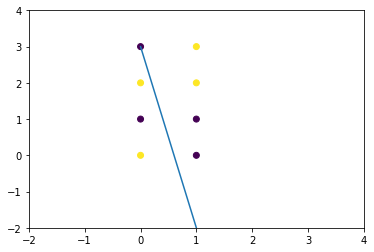

[-1.   0.2  0.6]


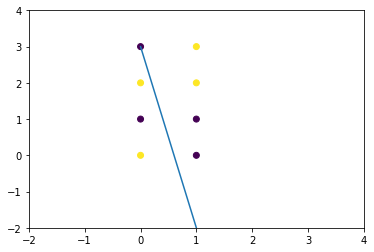

[-1.   0.2  0.6]


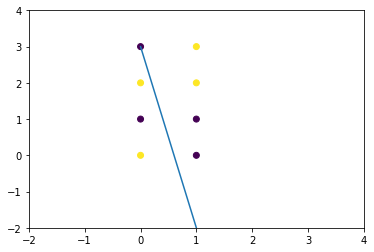

[-1.   0.2  0.6]


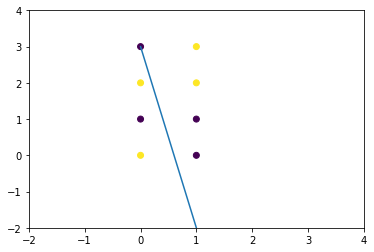

[-1.   0.2  0.6]


In [19]:
for i in range(x.shape[0]):
    current = np.array([x[i],y[i],1])
    line_eq = (( weight[0]/weight[1] )*np.array([0,1,2])) + weight[2]/weight[1]
    plt.scatter(x,y,c=class_y)
    plt.plot([0,1,2],line_eq)
    plt.ylim([-2,4])
    plt.xlim([-2,4])
    plt.show()
    print(weight)
    weight = weight_updater(weight,current,class_y[i],.2)

In [20]:
y_predicted = []
for i in range(x.shape[0]):
    current = np.array([x[i],y[i],1])
    y_predicted.append(predict(weight,current))


    
acc = accuracy(y_predicted,class_y)
print("Accuracy: " , 100*acc , "%")

Accuracy:  62.5 %


**2D 2nd degree**

In [21]:
x_2 = np.array([0,0,0,0,1,1,1,1])
y_2 = np.array([0,1,2,3,0,1,2,3])
class_y= np.array([-1,-1,1,-1,1,-1,1,1])

lst = [x_2,y_2]

In [22]:
var,comb,weights_n2 = combinations(lst,2)

In [23]:
y_predicted = []
for i in range(x_2.shape[0]):
    current = out_calculation(var,comb,weights_n2,i)
    y_predicted.append(current)

In [24]:
acc2 = accuracy(y_predicted,class_y)
print("Accuracy: " , 100*acc2 , "%")

Accuracy:  50.0 %


In [25]:
y_predicted

[1.0, 3.0, 7.0, 13.0, 3.0, 6.0, 11.0, 18.0]

In [26]:
weights_n2[0] = -10

In [27]:
y_predicted2 = []
for i in range(x_2.shape[0]):
    current2 = out_calculation(var,comb,weights_n2,i)
    y_predicted2.append(current2)

In [28]:
acc2 = accuracy(y_predicted2,class_y)
print("Accuracy: " , 100*acc2 , "%")

Accuracy:  37.5 %


In [29]:
y_predicted2

[1.0, 3.0, 7.0, 13.0, -8.0, -5.0, 0.0, 7.0]

**2D 3rd degree**

In [30]:
x_3 = np.array([0,0,0,0,1,1,1,1])
y_3 = np.array([0,1,2,3,0,1,2,3])
class_y= np.array([-1,-1,1,-1,1,-1,1,1])

lst = [x_3,y_3]

In [31]:
var,comb,weights_n2 = combinations(lst,3)

In [32]:
y_predicted = []
for i in range(x_3.shape[0]):
    current = out_calculation(var,comb,weights_n2,i)
    y_predicted.append(current)

In [33]:
acc2 = accuracy(y_predicted,class_y)
print("Accuracy: " , 100*acc2 , "%")

Accuracy:  50.0 %


In [34]:
y_predicted

[1.0, 4.0, 15.0, 40.0, 4.0, 10.0, 26.0, 58.0]

In [35]:
weights_n2[0] = -5

In [36]:
y_predicted2 = []
for i in range(x_3.shape[0]):
    current2 = out_calculation(var,comb,weights_n2,i)
    y_predicted2.append(current2)

In [37]:
acc2 = accuracy(y_predicted2,class_y)
print("Accuracy: " , 100*acc2 , "%")

Accuracy:  37.5 %


In [38]:
y_predicted2

[1.0, 4.0, 15.0, 40.0, -2.0, 4.0, 20.0, 52.0]

**3D 2nd Degree**

In [39]:
x_2 = np.array([0,0,0,0,1,1,1,1])
y_2 = np.array([0,1,2,3,0,1,2,3])
z_2 = np.array([0,1,3,0,1,2,0,1])
class_y= np.array([-1,-1,1,-1,1,-1,1,1])

lst = [x_2,y_2,z_2]

In [40]:
var,comb,weights_n2 = combinations(lst,2)

In [41]:
y_predicted = []
for i in range(x_2.shape[0]):
    current = out_calculation(var,comb,weights_n2,i)
    y_predicted.append(current)

In [42]:
acc2 = accuracy(y_predicted,class_y)
print("Accuracy: " , 100*acc2 , "%")

Accuracy:  50.0 %


In [43]:
y_predicted

[1.0, 6.0, 25.0, 13.0, 6.0, 16.0, 11.0, 24.0]

In [44]:
weights_n2[0] = -5

In [45]:
y_predicted2 = []
for i in range(x_2.shape[0]):
    current = out_calculation(var,comb,weights_n2,i)
    y_predicted2.append(current)

In [46]:
acc2 = accuracy(y_predicted2,class_y)
print("Accuracy: " , 100*acc2 , "%")

Accuracy:  37.5 %


In [47]:
y_predicted2

[1.0, 6.0, 25.0, 13.0, 0.0, 10.0, 5.0, 18.0]

**3D 3rd Degree**


In [48]:
x_3 = np.array([0,0,0,0,1,1,1,1])
y_3 = np.array([0,1,2,3,0,1,2,3])
z_3 = np.array([0,1,3,0,1,2,0,1])
class_y= np.array([-1,-1,1,-1,1,-1,1,1])

lst = [x_3,y_3,z_3]

In [49]:
var,comb,weights_n2 = combinations(lst,3)

In [50]:
y_predicted = []
for i in range(x_3.shape[0]):
    current = out_calculation(var,comb,weights_n2,i)
    y_predicted.append(current)

In [51]:
acc2 = accuracy(y_predicted,class_y)
print("Accuracy: " , 100*acc2 , "%")

Accuracy:  50.0 %


In [52]:
y_predicted

[1.0, 10.0, 90.0, 40.0, 10.0, 42.0, 26.0, 82.0]

In [53]:
weights_n2[0] = -5

In [54]:
y_predicted2 = []
for i in range(x_3.shape[0]):
    current2 = out_calculation(var,comb,weights_n2,i)
    y_predicted2.append(current2)

In [55]:
acc2 = accuracy(y_predicted2,class_y)
print("Accuracy: " , 100*acc2 , "%")

Accuracy:  50.0 %


In [56]:
y_predicted2

[1.0, 10.0, 90.0, 40.0, 4.0, 36.0, 20.0, 76.0]